In [18]:
import numpy as np
from itertools import product
from functools import reduce
import matplotlib.pyplot as plt 
%matplotlib inline

#----------------------------------------------------------------------
#// Define Pauli matrix
#----------------------------------------------------------------------

pauli_x = np.array([[0,1],[1,0]]).astype(float)
pauli_z = np.array([[1,0],[0,-1]]).astype(float)
Sx = pauli_x/2
Sz = pauli_z/2

#----------------------------------------------------------------------
#// Define Hamiltonian matrix
#----------------------------------------------------------------------

def Hx(N):
    """
    Construct \sum_{i} S^x_{i} for the given N
        N: system size
    """
    op_list = [np.eye(2) for i in range(N)]
    op_list[0] = Sx
    
    Hx = 0
    for i in range(N):
        Hx  += reduce(lambda a,b: np.kron(a,b), op_list)
        op_list = np.roll(op_list, 1, axis=0)
    return Hx


def Hxx(N):
    """
    Construct \sum_{i} S^x_{i} S^x_{i+1} for the given N
    in the periodic boundary condition
        N: system size
    """
    op_list = [np.eye(2) for i in range(N)]
    op_list[0] = Sx
    op_list[1] = Sx
    
    Hxx = 0
    for i in range(N):
        Hxx  += reduce(lambda a,b: np.kron(a,b), op_list)
        op_list = np.roll(op_list, 1, axis=0)
    return Hxx

def Hz(N):
    """
    Construct \sum_{i} S^z_{i} for the given N
        N: system size
    """
    op_list = [np.eye(2) for i in range(N)]
    op_list[0] = Sz
    
    Hz = 0
    for i in range(N):
        Hz += reduce(lambda a,b: np.kron(a,b), op_list)
        op_list = np.roll(op_list, 1, axis=0)
    return Hz

def Hzz(N):
    """
    Construct \sum_{i} S^z_{i} S^z_{i+1} for the given N 
    in the periodic boundary condition
        N: system size
    """
    op_list = [np.eye(2) for i in range(N)]
    op_list[0] = Sz
    op_list[1] = Sz
    
    Hzz = 0
    for i in range(N):
        Hzz += reduce(lambda a,b: np.kron(a,b), op_list)
        op_list = np.roll(op_list, 1, axis=0)
    return Hzz

In [17]:
print(np.kron(Sx,np.kron(np.eye(2),np.eye(2))) + np.kron(np.eye(2),np.kron(Sx,np.eye(2))) + np.kron(np.eye(2),np.kron(np.eye(2),Sx)))
print(Hx(3))

[[0.  0.5 0.5 0.  0.5 0.  0.  0. ]
 [0.5 0.  0.  0.5 0.  0.5 0.  0. ]
 [0.5 0.  0.  0.5 0.  0.  0.5 0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.5]
 [0.5 0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.5 0.  0.  0.5 0.  0.  0.5]
 [0.  0.  0.5 0.  0.5 0.  0.  0.5]
 [0.  0.  0.  0.5 0.  0.5 0.5 0. ]]
[[0.  0.5 0.5 0.  0.5 0.  0.  0. ]
 [0.5 0.  0.  0.5 0.  0.5 0.  0. ]
 [0.5 0.  0.  0.5 0.  0.  0.5 0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.5]
 [0.5 0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.5 0.  0.  0.5 0.  0.  0.5]
 [0.  0.  0.5 0.  0.5 0.  0.  0.5]
 [0.  0.  0.  0.5 0.  0.5 0.5 0. ]]


### Transverse Field Ising Model
$$
H = -J\sum_{i}S^x_{i}S^x_{i+1} -h\sum_{i}S^z_{i}
$$

#### Magnitization in x-axis $\langle m_x\rangle$

1. Compute $\langle m_x\rangle$ =  $\langle 0 | H_x | 0 \rangle$/N 

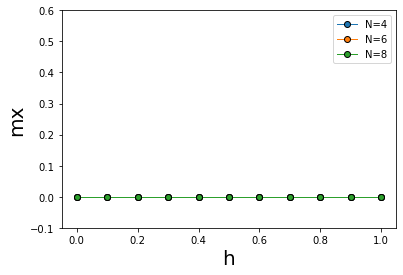

Wall time: 3.16 s


In [19]:
%%time
# -----------------------------------------------------
#// parameter
# -----------------------------------------------------
Nlist = [4,6,8]
J = 1
hlist = np.linspace(0,1,11)

# -----------------------------------------------------
#// Calculate
# -----------------------------------------------------
for N in Nlist:
    
    #// Compute <mx> for the given N
    mlist = np.zeros(hlist.size)
    for i in range(hlist.size):
        H = -J*Hxx(N)-hlist[i]*Hz(N)
        GS = np.linalg.eigh(H)[1].T[0]
        mlist[i] = (GS @ Hx(N) @ GS)/N
    
    #// Plot
    plt.plot(hlist, mlist, linewidth=1, marker='o', 
             markeredgecolor='k', label='N=%d'%N)
    
plt.xlabel('h', fontsize=20)
plt.ylabel('mx', fontsize=20)
plt.ylim(-0.1,0.6)
plt.legend()
plt.show()

2. Compute $\langle m_x\rangle$ =  |$\langle 1 | H_x | 0 \rangle$|/N 

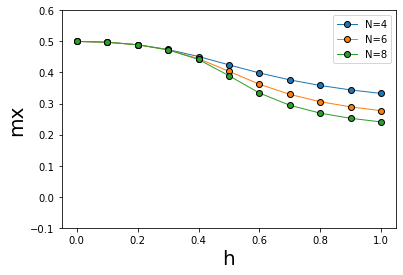

Wall time: 618 ms


In [8]:
%%time
# -----------------------------------------------------
#// parameter
# -----------------------------------------------------
Nlist = [4,6,8]
J = 1
hlist = np.linspace(0,1,11)

# -----------------------------------------------------
#// Calculate
# -----------------------------------------------------
for N in Nlist:
    
    #// Compute <mx> for the given N
    mlist = np.zeros(hlist.size)
    for i in range(hlist.size):
        H = -J*Hxx(N)-hlist[i]*Hz(N)
        GS = np.linalg.eigh(H)[1].T[0]
        ES = np.linalg.eigh(H)[1].T[1]
        mlist[i] = abs((ES @ Hx(N) @ GS)/N)
    
    #// Plot
    plt.plot(hlist, mlist, linewidth=1, marker='o', 
             markeredgecolor='k', label='N=%d'%N)
    
plt.xlabel('h', fontsize=20)
plt.ylabel('mx', fontsize=20)
plt.ylim(-0.1,0.6)
plt.legend()
plt.show()

3. Consider H' = H - $\delta h_x$Hx and compute $\langle m_x\rangle$ =  $\langle 0 | H_x | 0 \rangle$/N 

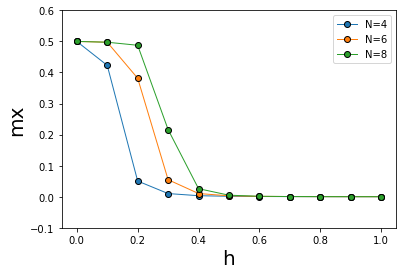

Wall time: 690 ms


In [9]:
%%time
# -----------------------------------------------------
#// parameter
# -----------------------------------------------------
Nlist = [4,6,8]
J = 1
hlist = np.linspace(0,1,11)
hx = 1e-4

# -----------------------------------------------------
#// Calculate
# -----------------------------------------------------
for N in Nlist:
    
    #// Compute <mx> for the given N
    mlist = np.zeros(hlist.size)
    for i in range(hlist.size):
        H = -J*Hxx(N)-hlist[i]*Hz(N)-hx*Hx(N)
        GS = np.linalg.eigh(H)[1].T[0]
        mlist[i] = (GS @ Hx(N) @ GS)/N
    
    #// Plot
    plt.plot(hlist, mlist, linewidth=1, marker='o', 
             markeredgecolor='k', label='N=%d'%N)
    
plt.xlabel('h', fontsize=20)
plt.ylabel('mx', fontsize=20)
plt.ylim(-0.1,0.6)
plt.legend()
plt.show()

#### Magnitization in z-axis $\langle m_z\rangle$

Compute $\langle m_z\rangle$ =  |$\langle 0 | H_z | 0 \rangle$|/N 

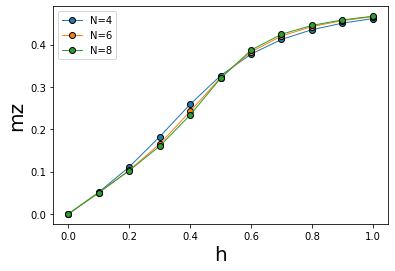

Wall time: 538 ms


In [11]:
%%time
# -----------------------------------------------------
#// parameter
# -----------------------------------------------------
Nlist = [4,6,8]
J = 1
hlist = np.linspace(0,1,11)

# -----------------------------------------------------
#// Calculate
# -----------------------------------------------------
for N in Nlist:
    
    #// Compute <mz> for the given N
    mlist = np.zeros(hlist.size)
    for i in range(hlist.size):
        H = -J*Hxx(N)-hlist[i]*Hz(N)
        GS = np.linalg.eigh(H)[1].T[0]
        mlist[i] = (GS @ Hz(N) @ GS)/N
    
    #// Plot
    plt.plot(hlist, mlist, linewidth=1, marker='o', 
             markeredgecolor='k', label='N=%d'%N)
    
plt.xlabel('h', fontsize=20)
plt.ylabel('mz', fontsize=20)
plt.legend()
plt.show()

#### Grandstate Energy $E/N$

compute $E_0 / N$

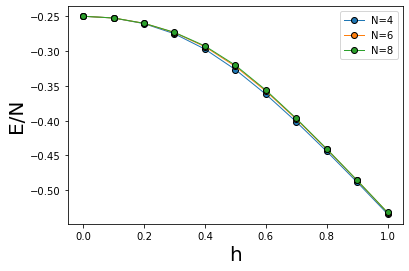

Wall time: 558 ms


In [3]:
%%time
# -----------------------------------------------------
#// parameter
# -----------------------------------------------------
Nlist = [4,6,8]
J = 1
hlist = np.linspace(0,1,11)

# -----------------------------------------------------
#// Calculate
# -----------------------------------------------------
for N in Nlist:
    
    #// Compute E/N for the given N
    Elist = np.zeros(hlist.size)
    for i in range(hlist.size):
        H = -J*Hxx(N)-hlist[i]*Hz(N)
        Elist[i] = np.linalg.eigh(H)[0][0]/N
    
    #// Plot
    plt.plot(hlist, Elist, linewidth=1, marker='o', 
         markeredgecolor='k', label='N=%d'%N)

plt.xlabel('h', fontsize=20)
plt.ylabel('E/N', fontsize=20)
plt.legend()
plt.show()

#### Gap $\Delta$

compute $\Delta=E_1-E_0$

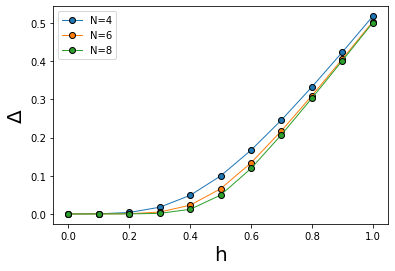

Wall time: 440 ms


In [17]:
%%time
# -----------------------------------------------------
#// parameter
# -----------------------------------------------------
Nlist = [4,6,8]
J = 1
hlist = np.linspace(0,1,11)

# -----------------------------------------------------
#// Calculate
# -----------------------------------------------------
for N in Nlist:
    
    #// Compute Gap for the given N
    Gaplist = np.zeros(hlist.size)
    for i in range(hlist.size):
        H = -J*Hxx(N)-hlist[i]*Hz(N)
        E = np.linalg.eigh(H)[0]
        Gaplist[i] = E[1]-E[0]
    
    #// Plot
    plt.plot(hlist, Gaplist, linewidth=1, marker='o', 
         markeredgecolor='k', label='N=%d'%N)

plt.xlabel('h', fontsize=20)
plt.ylabel('$\Delta$', fontsize=20)
plt.legend()
plt.show()

#### second differentiation of energy $-d^2E$

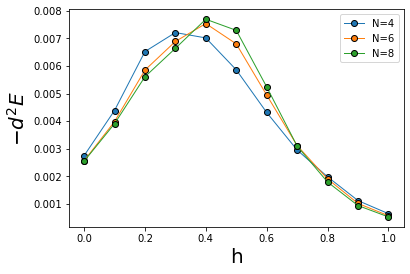

Wall time: 439 ms


In [20]:
%%time
# -----------------------------------------------------
#// parameter
# -----------------------------------------------------
Nlist = [4,6,8]
J = 1
hlist = np.linspace(0,1,11)

# -----------------------------------------------------
#// Calculate
# -----------------------------------------------------
for N in Nlist:
    
    #// Compute E/N for the given N
    Elist = np.zeros(hlist.size)
    for i in range(hlist.size):
        H = TFIM(N, J, hlist[i])
        Elist[i] = np.linalg.eigh(H)[0][0]/N
    
    #// Plot
    plt.plot(hlist, -np.gradient(np.gradient(Elist)), linewidth=1, marker='o', 
         markeredgecolor='k', label='N=%d'%N)

plt.xlabel('h', fontsize=20)
plt.ylabel('$-d^2E$', fontsize=20)
plt.legend()
plt.show()